In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Nusu Queen\\Desktop\\Data Science Project'

In [3]:
train_path = 'C:/Users/Nusu Queen/Desktop/Data Science Project/TopperWorld/Detection of Road lane line/Data/data_road_224/training'
test_path = 'C:/Users/Nusu Queen/Desktop/Data Science Project/TopperWorld/Detection of Road lane line/Data/data_road_224/testing'

In [4]:
IMG_DIM = 32
CLASSES = sorted(['Class1','Class2'])

In [5]:
train_gen = ImageDataGenerator().flow_from_directory(
    directory=train_path, 
    target_size = (IMG_DIM,IMG_DIM), 
    classes=CLASSES)

val_gen = ImageDataGenerator( validation_split=0.2).flow_from_directory(
    directory=train_path, 
    target_size = (IMG_DIM,IMG_DIM), 
    classes=CLASSES, 
    subset='validation')

test_gen = ImageDataGenerator().flow_from_directory(
    directory=test_path, 
    target_size = (IMG_DIM,IMG_DIM), 
    classes=CLASSES, 
    shuffle=False)

Found 289 images belonging to 2 classes.
Found 57 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [6]:
train_gen.class_indices

{'Class1': 0, 'Class2': 1}

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [8]:
def LeNet(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    return model

In [9]:
# Define the input shape and number of classes
input_shape = (IMG_DIM, IMG_DIM, 3)
num_classes = 2

# Create the LeNet model
model = LeNet(input_shape, num_classes)

# Print the model summary
model.summary()
MODEL_PATH = 'saved-models/LeNet'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint],
)

Epoch 1/20
 9/10 [==========================>...] - ETA: 0s - loss: 3.2834 - accuracy: 0.5208
Epoch 1: val_loss improved from inf to 1.26553, saving model to saved-models\LeNet
10/10 [==============================] - 4s 320ms/step - loss: 3.2789 - accuracy: 0.5190 - val_loss: 1.2655 - val_accuracy: 0.4912
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.9559 - accuracy: 0.5813
Epoch 2: val_loss improved from 1.26553 to 0.82327, saving model to saved-models\LeNet
10/10 [==============================] - 1s 128ms/step - loss: 0.9559 - accuracy: 0.5813 - val_loss: 0.8233 - val_accuracy: 0.5789
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.7861 - accuracy: 0.5986
Epoch 3: val_loss improved from 0.82327 to 0.60295, saving model to saved-models\LeNet
10/10 [==============================] - 1s 116ms/step - loss: 0.7861 - accuracy: 0.5986 - val_loss: 0.6030 - val_accuracy: 0.6491
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 

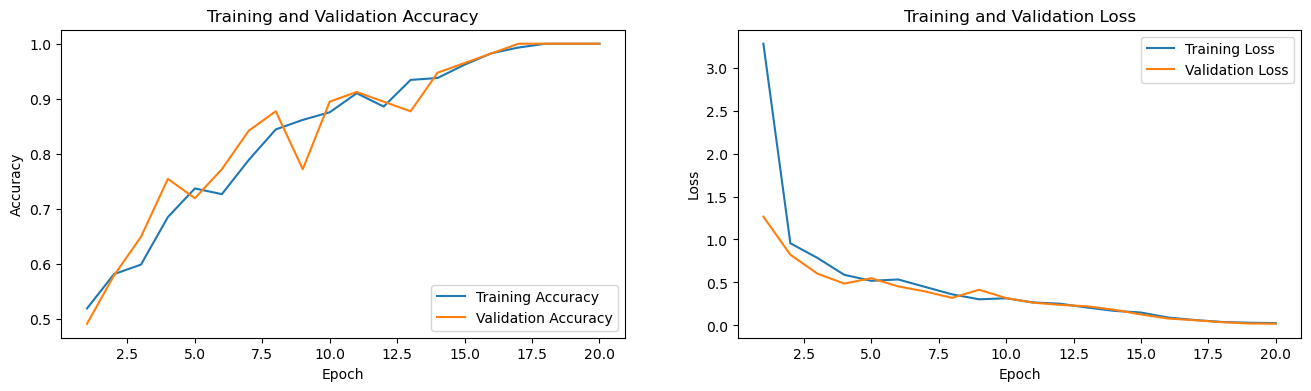

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
score = model.evaluate(test_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10/10 [==============================] - 6s 565ms/step - loss: 1.6728 - accuracy: 0.5276
Test loss: 1.6728485822677612
Test accuracy: 0.5275862216949463


In [14]:
score = model.evaluate(train_gen)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

10/10 [==============================] - 1s 79ms/step - loss: 0.0181 - accuracy: 1.0000
Train loss: 0.018089525401592255
Train accuracy: 1.0


In [15]:
predict=model.predict(test_gen)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

10/10 [==============================] - 4s 349ms/step


array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [16]:
# np.round(predictions)

In [17]:
cm = confusion_matrix(y_true=test_gen.classes, y_pred=np.argmax(predict, axis=-1))

(2.5, -0.5)

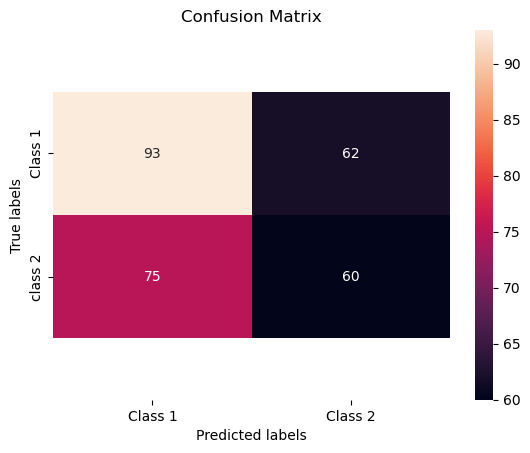

In [18]:
import seaborn as sn
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Class 1', 'Class 2']);ax.yaxis.set_ticklabels(['Class 1', 'class 2']);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import mean_squared_error

In [20]:
print(classification_report(test_gen.classes, y_classes))

              precision    recall  f1-score   support

           0       0.55      0.60      0.58       155
           1       0.49      0.44      0.47       135

    accuracy                           0.53       290
   macro avg       0.52      0.52      0.52       290
weighted avg       0.52      0.53      0.53       290



In [21]:
roc_auc = roc_auc_score(test_gen.classes, np.argmax(predict, axis=-1))

print(roc_auc)

0.5222222222222221


In [22]:
mse = mean_squared_error(test_gen.classes, np.argmax(predict, axis=-1))
rmse = np.sqrt(mse)
print(rmse)

0.6873236450926509


In [23]:
print(accuracy_score(test_gen.classes, np.argmax(predict, axis=-1)))

0.5275862068965518
